In [1]:
%matplotlib widget

In [2]:
import numpy as np
import pandas as pd
from matplotlib import cm, pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import glob
import re

In [3]:
eti='Ea'

In [4]:
dag_='full' # 2 or full

In [5]:
data_dag_full = pd.read_csv("Results_DAG_full/ate_vector_{}.csv".format(eti))

In [6]:
data_dag_2 = pd.read_csv("Results_DAG_2/ate_vector_{}.csv".format(eti))

In [7]:
###### PLOT DAG

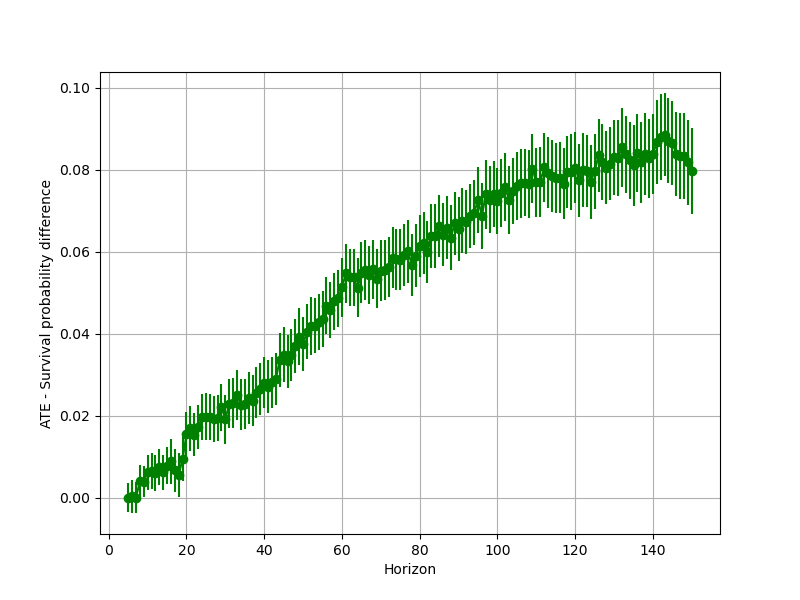

In [24]:
# Create the plot
plt.figure(figsize=(8, 6))  # Adjust figure size as desired

# Plot the line with error bars
plt.errorbar(data_dag_full['index'], data_dag_full['ate'], yerr=1.96*data_dag_full['ate_std'], fmt='o-', color='green')

# Customize the plot
#plt.title('Line Plot with Error Bars')
plt.xlabel('Horizon')
plt.ylabel('ATE - Survival probability difference')
plt.grid(True)
#plt.legend()

# Display the plot
plt.show()
plt.savefig('Results_DAG_full/ate_{}.pdf'.format(eti))

In [ ]:
###### PLOT 2 DAGS

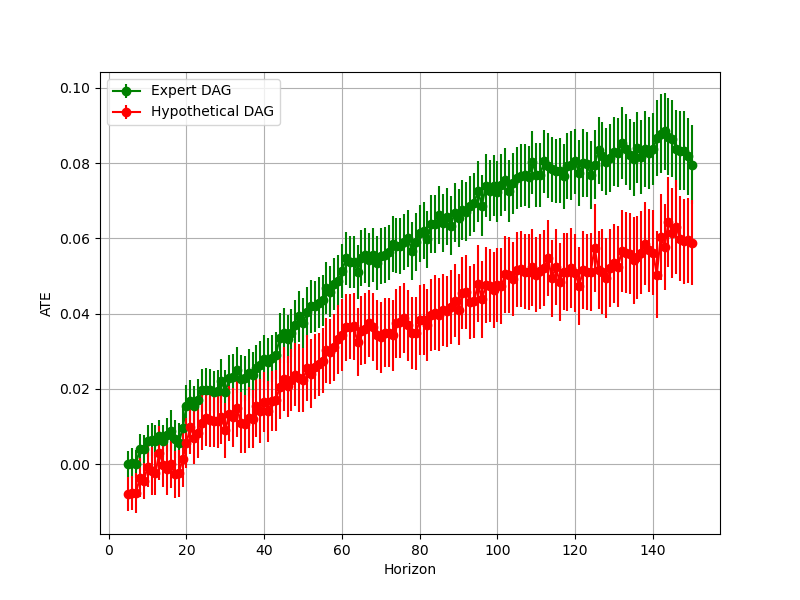

In [9]:
# Create the plot
plt.figure(figsize=(8, 6))  # Adjust figure size as desired

# Plot the line with error bars
plt.errorbar(data_dag_full['index'], data_dag_full['ate'], yerr=1.96*data_dag_full['ate_std'], fmt='o-', color='green', label='Expert DAG')
plt.errorbar(data_dag_2['index'], data_dag_2['ate'], yerr=1.96*data_dag_2['ate_std'], fmt='o-', color='red', label='Hypothetical DAG')

# Customize the plot
#plt.title('Line Plot with Error Bars')
plt.xlabel('Horizon')
plt.ylabel('ATE')
plt.grid(True)
plt.legend(loc=2)

# Display the plot
plt.show()
plt.savefig('2_ates_{}.pdf'.format(eti))

In [10]:
###### PLOT Unstables

In [11]:
# Define the identifier (eti)
eti = 'Ei'

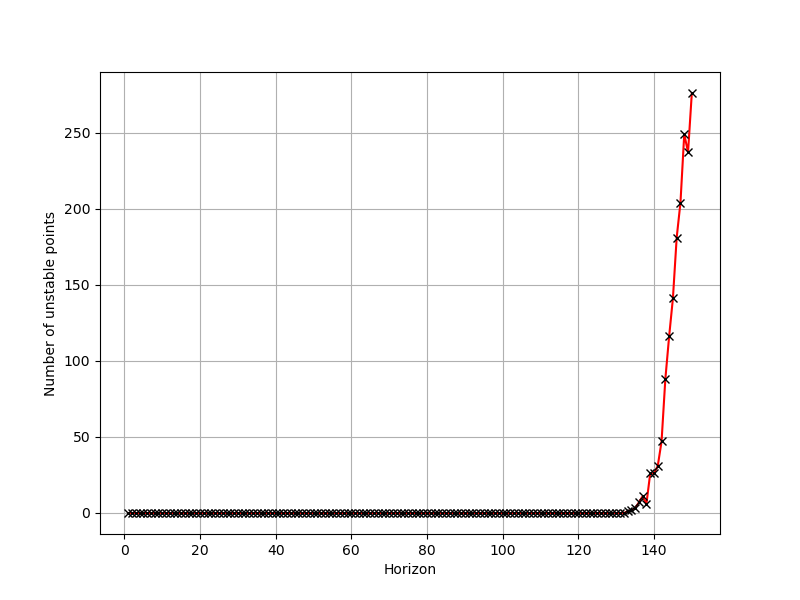

In [24]:
# Read lines from the text file
with open(f"Results_DAG_full/output_{eti}.txt", 'r') as f:
  lines = f.readlines()

# Filter lines starting without quotes (similar to grep)
filtered_lines = [line for line in lines if re.match(r"^[^\"]*$", line)]

# Extract numeric values, handle potential missing values (similar to sub)
wrongs = [float(line.replace("[1] ", "")) for line in filtered_lines if line.strip()]  # handle empty lines

# Create missing values (zeros) to reach desired length
zeros = [0] * (150 - len(wrongs))

# Combine data and create DataFrame
all_wrongs = pd.DataFrame({"all_wrongs": zeros + wrongs})

# Add index column
all_wrongs["index"] = range(1, len(all_wrongs) + 1)  # Start index from 1

# Create the plot
plt.figure(figsize=(8, 6))  # Adjust figure size as desired

# Line plot
plt.plot(all_wrongs["index"], all_wrongs["all_wrongs"], color="red", marker='x', markeredgecolor='black')


# Customize plot
plt.xlabel("Horizon")
plt.ylabel("Number of unstable points")
#plt.title(f"Unstable Points - {eti}")
#plt.legend()
plt.grid(True)

# Save the plot (replace pdf with your desired format)
plt.savefig(f"Results_DAG_full/unstable_points_{eti}.pdf")  # Adjust file extension

plt.show()  # Optional: Display the plot before saving